### **Python `try…except`**  

**Özet:**  
Bu eğitimde, Python'daki `try...except` ifadesini kullanarak hataları nasıl düzgün bir şekilde ele alacağınızı öğreneceksiniz.

---

### **Python’da Hata Türleri**  

Python’da iki temel hata türü vardır:  
1. **Sözdizimi (Syntax) Hataları**  
2. **İstisnalar (Exceptions)**  

---

### **Sözdizimi Hataları (Syntax Errors)**  

Geçersiz bir Python kodu yazdığınızda bir sözdizimi hatası alırsınız. Örneğin:  

```python
current = 1
if current < 10
current += 1
```
**Hata Çıktısı:**  

```shell
File "d:/python/try-except.py", line 2
    if current < 10
                  ^
SyntaxError: invalid syntax
```

**Neden?**  
- `if` ifadesinden sonra **":" (iki nokta üst üste)** eksik olduğu için hata alınır.  
- Python yorumlayıcısı, hatanın **hangi dosyada ve satırda** oluştuğunu gösterir.  

---

### **İstisnalar (Exceptions)**  

Kodunuzun sözdizimi doğru olsa bile, çalıştırıldığında hata oluşabilir. Python’da bu tür hatalara **istisna (exception)** denir.  

İstisnalar genellikle çalıştıkları **ortamdan** kaynaklanır:  
- Var olmayan bir dosyayı okumak  
- İnternete bağlı olmayan bir sunucuya bağlanmaya çalışmak  
- Kullanıcının yanlış veri girişi yapması  

Bu tür hatalar program tarafından otomatik olarak yönetilmez ve bir hata mesajı ile sonuçlanır.

#### **Örnek: Satış Artışını Hesaplayan Program**
```python
# Net satışları al
print('Enter the net sales for')

previous = float(input('- Prior period:'))
current = float(input('- Current period:'))

# Yüzde değişimi hesapla
change = (current - previous) * 100 / previous

# Sonucu göster
if change > 0:
    result = f'Sales increase {abs(change)}%'
else:
    result = f'Sales decrease {abs(change)}%'

print(result)
```

Bu program, kullanıcının iki sayı girmesini ister ve satış artışını yüzdesel olarak hesaplar.

**Ancak, kullanıcı yanlış bir giriş yaparsa ne olur?**  

Örneğin, `current` değeri olarak `"120'"` girildiğinde şu hata alınır:  

```shell
Enter the net sales for
- Prior period:100
- Current period:120'
Traceback (most recent call last):
  File "d:/python/try-except.py", line 5, in <module>
    current = float(input('- Current period:'))
ValueError: could not convert string to float: "120'"
```

**Hata Açıklaması:**  
- Hatanın oluştuğu dosya: `d:/python/try-except.py`  
- Hata satırı: **5. satır**  
- Hatanın oluştuğu kod: `current = float(input('- Current period:'))`  
- Hata türü: **ValueError**  
- Hata mesajı: **ValueError: could not convert string to float: "120'"**  

**Sebep:**  
- `float()` fonksiyonu `"120'"` gibi yanlış formatlı bir metni sayıya çeviremediği için **ValueError** istisnası oluştu.  

Python’da **TypeError, NameError, ValueError** gibi farklı istisna türleri vardır.

---

### **İstisnaları Yönetme (Handling Exceptions)**  

Programın daha sağlam çalışmasını sağlamak için oluşan hataları yönetmemiz gerekir.  
Bu sayede kullanıcıyı bilgilendirip, hatanın düzeltilmesini sağlayabiliriz.  

Python’daki **`try...except`** yapısını kullanarak hata yönetimi yapabiliriz:  

```python
try:
    # Hata oluşabilecek kod
except:
    # Hata yönetimi
```

---

### **`try…except` Nasıl Çalışır?**  
1. `try` bloğundaki kod **önce çalıştırılır**.  
2. Eğer **hata oluşmazsa**, `except` bloğu **atlanır** ve program normal çalışmaya devam eder.  
3. Eğer **hata oluşursa**, `try` bloğunun geri kalanı çalıştırılmaz ve **doğrudan `except` bloğuna geçilir**.  

---

Bu yapıyı daha iyi anlamak için bir akış diyagramı kullanılabilir.

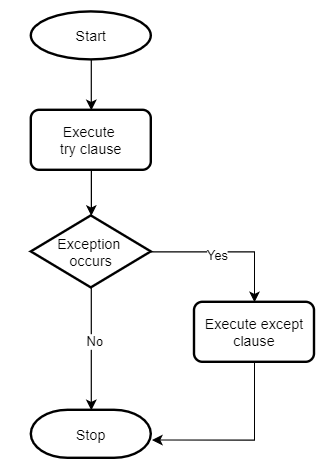

In [2]:
from IPython.display import Image

# Aynı dizindeki bir resmi görüntüleme
Image(filename="Python-try-except.png", width=300, height=200)

### **Python `try…except` ile Hata Yönetimi**  

Python’da hataları yönetmek için `try...except` ifadesini kullanabilirsiniz. Bunun için:  
- Hata oluşturabilecek kodu **`try` bloğuna** yerleştirin.  
- Hataları ele alan kodu **`except` bloğuna** yerleştirin.  

---

### **Örnek: Hata Yönetimi ile Güncellenmiş Program**  

```python
try:
    # Net satışları al
    print('Enter the net sales for')

    previous = float(input('- Prior period:'))
    current = float(input('- Current period:'))

    # Yüzde değişimi hesapla
    change = (current - previous) * 100 / previous

    # Sonucu göster
    if change > 0:
        result = f'Sales increase {abs(change)}%'
    else:
        result = f'Sales decrease {abs(change)}%'

    print(result)
except:
    print('Error! Please enter a number for net sales.')
```

**Çıktı (Hatalı Giriş Durumunda):**  
```shell
Enter the net sales for
- Prior period:100
- Current period:120'
Error! Please enter a number for net sales.
```

---

## **Belirli Hataları Yakalama (Catching Specific Exceptions)**  

Bazen, tüm hataları tek bir `except` bloğunda yakalamak yerine, belirli hataları yönetmek isteyebilirsiniz.  

Örneğin:  
- Kullanıcı **geçersiz bir giriş yaparsa** → `ValueError` oluşur.  
- Kullanıcı **önceki dönem satışlarını sıfır girerse** → `ZeroDivisionError` oluşur.  

Bu tür hataları ayrı ayrı yönetmek için `except` bloğuna hata türünü ekleyebilirsiniz:

```python
try:
    # Net satışları al
    print('Enter the net sales for')

    previous = float(input('- Prior period:'))
    current = float(input('- Current period:'))

    # Yüzde değişimi hesapla
    change = (current - previous) * 100 / previous

    # Sonucu göster
    if change > 0:
        result = f'Sales increase {abs(change)}%'
    else:
        result = f'Sales decrease {abs(change)}%'

    print(result)
except ValueError:
    print('Error! Please enter a number for net sales.')
```

Eğer kullanıcı **metin girerse**, hata mesajı gösterilir:  
```shell
Enter the net sales for
- Prior period:100
- Current period:abc
Error! Please enter a number for net sales.
```

---

### **Sıfır ile Bölme Hatası (ZeroDivisionError)**  

Eğer önceki dönem satışları **sıfır girilirse**, Python şu hatayı üretir:

```shell
Traceback (most recent call last):
  File "d:/python/try-except.py", line 9, in <module>
    change = (current - previous) * 100 / previous
ZeroDivisionError: float division by zero
```

Bu hatayı önlemek için `ZeroDivisionError` istisnasını da ele alabiliriz:

```python
try:
    # Net satışları al
    print('Enter the net sales for')

    previous = float(input('- Prior period:'))
    current = float(input('- Current period:'))

    # Yüzde değişimi hesapla
    change = (current - previous) * 100 / previous

    # Sonucu göster
    if change > 0:
        result = f'Sales increase {abs(change)}%'
    else:
        result = f'Sales decrease {abs(change)}%'

    print(result)
except ValueError:
    print('Error! Please enter a number for net sales.')
except ZeroDivisionError:
    print('Error! The prior net sales cannot be zero.')
```

Eğer önceki dönem satışları sıfır girilirse, hata mesajı şu şekilde olacaktır:

```shell
Enter the net sales for
- Prior period:0
- Current period:120
Error! The prior net sales cannot be zero.
```

---

## **Birden Fazla Hata Yakalama (Handling Multiple Exceptions)**  

Birden fazla istisna türünü tek bir `except` bloğunda gruplayabilirsiniz:

```python
try:
    # Hata oluşturabilecek kod
except (ValueError, ZeroDivisionError):
    print("Hata oluştu!")
```

Bu, hem `ValueError` hem de `ZeroDivisionError` durumlarında aynı mesajın gösterilmesini sağlar.

Daha ayrıntılı hata yönetimi yapmak istiyorsanız her hata için ayrı `except` blokları kullanabilirsiniz:

```python
try:
    # Net satışları al
    print('Enter the net sales for')

    previous = float(input('- Prior period:'))
    current = float(input('- Current period:'))

    # Yüzde değişimi hesapla
    change = (current - previous) * 100 / previous

    # Sonucu göster
    if change > 0:
        result = f'Sales increase {abs(change)}%'
    else:
        result = f'Sales decrease {abs(change)}%'

    print(result)
except ValueError:
    print('Error! Please enter a number for net sales.')
except ZeroDivisionError:
    print('Error! The prior net sales cannot be zero.')
except Exception as error:
    print(f"Unexpected error: {error}")
```

Bu kod, **bilinmeyen tüm diğer hataları da yakalamak için** `Exception` bloğunu ekler.

---

## **Özet**  
✔ Python `try...except` ifadesi ile hataları düzgün bir şekilde yönetebilirsiniz.  
✔ Hata türlerini spesifik olarak `except` bloğunda belirtmek iyi bir uygulamadır.  
✔ `Exception` bloğunu kullanarak beklenmeyen hataları da yakalayabilirsiniz.